# Frekvencijski spektar

U ovoj sveci biće sumirane osobine frekvencijskog spektra. Prvo ćemo se podsetiti pojmova kao što su frekvencijska rezolucija i maksimalna frekvencija, a potom ćemo upoznati fenomen curenja spektra i tehniku dopune nulama. 

In [1]:
import numpy as np
from numpy import fft 
from matplotlib import pyplot as plt
from matplotlib import patches

Pretpostavka na kojoj je znasnovana diskretna Furijeova transformacija je da je njen ulaz `jedan` period periodičnog signala.

In [2]:
t = np.arange(0, 32)

In [3]:
N = len(t)

In [4]:
s = np.linspace(0, 1, N)

In [5]:
s_periodic = np.hstack([s]*4)

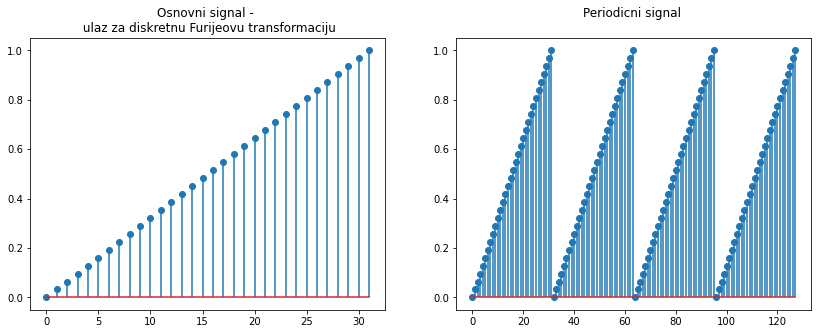

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.stem(t, s)
ax1.set_title('Osnovni signal - \n ulaz za diskretnu Furijeovu transformaciju')

ax2.stem(s_periodic)
ax2.set_title('Periodicni signal \n')

plt.show()

Ako je $N$ broj uzoraka signala koji su uzorkovani frekvencijom $F_s$, podsetimo se da su uzorci u vremenskom domenu na medjusobnom rastojanju $T_s=\frac{1}{F_s}$, a u frekvencijskom domenu na rastojanju $\Delta f = \frac{F_s}{N}$ tj. $\Delta f = \frac{1}{T}$ gde je $T = N \cdot T_s$ ukupno vreme trajanja signala. U tom smislu smo govorili o vremenskoj i frekvencijskoj rezoluciji. 

Ukoliko je reč o uzorkovanju signala sa kompleksnim vrednostima, najveća frekvencija koja je prisutna na frekvencijskoj skali je $F_{max} = \Delta f \cdot {N} = Fs$. Ukoliko je reč o uzorkovanju signala sa realnim vrednostima, frekvencijski spektar je simetričan i samo prvih $\frac{N}{2}$ podeoka nosi informacije o signalu. Zato je maksimalna frekvencija $F_{max} = \frac{Fs}{2}$ što je i u skladu sa Najkvistovom teoremom.

Uzimajući prethodno u obzir, podeoci na frekvencijskoj skali su određeni nizom vrednosti $0$, $\frac{Fs}{N}$, 2$\frac{Fs}{N}$,...,$k\frac{Fs}{N}$, ..., $(N−1)\frac{Fs}{N}$. Prva polovina ovog niza podeoka predstavlja `pozitivne` frekvencije, a druga, zbog simentričnosti spektra, `negativne` frekvencije. Umesto ovog zapisa može se koristiti i zapis frekvencija oblika od $-\frac{F_s}{2}$ do $\frac{F_s}{2}$ sa nultom frekvencijom u centru. 

Frekvencijsku skalu možemo manuelno generisati zadavanjem željenih granica funkciji `arange`. Možemo koristiti i bibliotečku funkciju `fftfreq`. Sa njom u vezi stoji i napomena o nešto drugačijem rasporedu frekvencija: nulta frekvencija je na početku generisane skale, za njom slede pozitivne frekvencije, a za njima i negativne frekvencije u inverznom poretku.

Da bismo ispratili različite načine zapisa podeoka skale, možemo posmatrati kosinusni signal $cos(2\pi\cdot20\cdot t)$ koji se uzorkuje frekvencijom 1000Hz. Možemo pretpostaviti da je uzorkovano 1000 vrednosti.

## Curenje spektra

Posmatrajmo sada kosinusni signal $cos(2\pi\cdot2\cdot t)$ koji se uzorkuje frekvencijom 50Hz u trajanju od 0.8 sekundi.

## Dopuna nulama (engl. zero-padding)

U prethodnoj sekciji smo videli da ako ako pratimo signal koji nije ceo umnožak osnovnog perioda imamo problem sa curenjem spektra i detektovanjem prave frekvencije u frekvencijskom spektru.

Pogledajmo šta će se dogoditi ako u prethodnom primeru uzorkovani signal dopunimo određenim brojem nula.

In [7]:
Fs = 50 
f0 = 2
T = 0.8 
t = np.arange(0, T, 1/Fs)  
N = len(t)

Prvo ćemo odrediti Furijeove koeficijente koristeći prave vrednosti uzorkovanog signala. 

In [8]:
cos_t = np.cos(2*np.pi*f0*t) 
freq = np.arange(-Fs/2, Fs/2, Fs/N)  
c = fft.fft(cos_t)
c_shifted = fft.fftshift(c)

Potom ćemo odrediti Furijeove koeficijente signala koji se dobija nadovezivanjem nula na vrednosti uzorkovanog signala. U našem slučaju broj nula će biti sedam puta veći od dužine uzorkovanog signala.

Tehnika dopune nulama ne može uvek da nam pomogne u očitavanju frekvencija. Na primer, njome ne možemo postići razlikovanje dveju bliskih frekvencija u frekvencijskom spektru. Uverimo se u to primerom signala oblika $cos(2\pi f_0 t)+cos(2\pi f_1 t)$ za $f_0=2$ i $f_1=2.3$. Možemo pretpostaviti da se signal uzorkuje frekvencijom 50Hz u trajanju od jedne sekunde.

In [9]:
Fs = 50
T = 1

In [10]:
f0 = 2
f1 = 2.3
t = np.arange(0, T, 1/Fs)
N = len(t)
signal = lambda t: np.cos(2*np.pi*f0*t) + np.cos(2*np.pi*f1*t)